In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

In [82]:
df1 = pd.read_csv("./rsivl_features.csv")
df2 = pd.read_pickle("./rsivl_dataframe.p")

In [83]:
df2["filename"] = df2["filename"].apply(lambda x: x[:-4])
df2 = df2.sort_values("filename")
df1 = df1[df1["image"] != "imm(20)"]
df2 = df2.drop(["4points", "8points", "16points", "32points","64points", "complexity", "computed_average"], axis=1)
df1 = df1.rename(columns={"complexity_rating": "complexity_paper_averages"})

In [84]:
df = pd.concat([df1.set_index('image'), df2.set_index('filename')], axis=1, join='inner')
df.shape

# Remove Outliers

In [91]:
participants = list(range(1, 27))
participants = [x for x in participants if x not in [13, 17, 18, 26]]
df["complexity_no_outliers"] = df[["participant{}".format(i) for i in participants]].mean(axis=1)

In [95]:
def report_correlations(x, y):
    model = np.poly1d(np.polyfit(x, y, 1))
    print(stats.pearsonr(x, y), stats.spearmanr(x, y), r2_score(y, model(x)))

In [100]:
report_correlations(df["complexity_no_outliers"], df["num_seg_5"])
report_correlations(df["complexity_paper_averages"], df["num_seg_5"])

PearsonRResult(statistic=0.8136533241719136, pvalue=2.0768286515301878e-12) SignificanceResult(statistic=0.8544013541949153, pvalue=1.1338527673483075e-14) 0.6620317319360052
PearsonRResult(statistic=0.801299748620105, pvalue=7.880184101010334e-12) SignificanceResult(statistic=0.8257966560844093, pvalue=5.068811125204044e-13) 0.6420812871386434


In [101]:
report_correlations(df["complexity_no_outliers"], df["num_seg_4"])
report_correlations(df["complexity_paper_averages"], df["num_seg_4"])

PearsonRResult(statistic=0.8263863345556859, pvalue=4.720308743852751e-13) SignificanceResult(statistic=0.8365723951375125, pvalue=1.319976800796185e-13) 0.6829143739403822
PearsonRResult(statistic=0.8109511051285976, pvalue=2.803316773355055e-12) SignificanceResult(statistic=0.8034633518605167, pvalue=6.2815358306266105e-12) 0.6576416949092938


# Visualization

In [132]:
def rank_xform(c):
    return c.rank(axis=0, method="average")

def sqrt_xform(c):
    return np.sqrt(c)

In [154]:
def plot_scatter(x, y):
    plt.scatter(x, y);
    model = np.poly1d(np.polyfit(x, y, 1))
    plt.plot(x, model(x), color="r", label="Pearson {:.3f}, R^2 {:.3f}".format(stats.pearsonr(x, y).statistic, r2_score(y, model(x))))
    plt.legend()

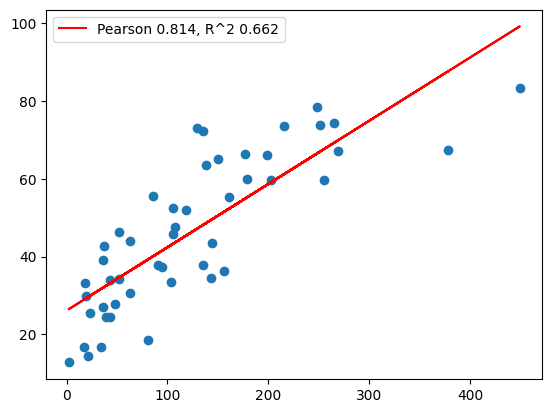

In [155]:
plot_scatter(df["num_seg_5"], df["complexity_no_outliers"])

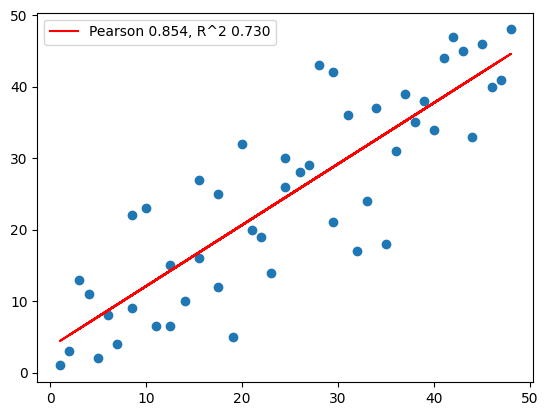

In [156]:
plot_scatter(rank_xform(df["num_seg_5"]), rank_xform(df["complexity_no_outliers"]))

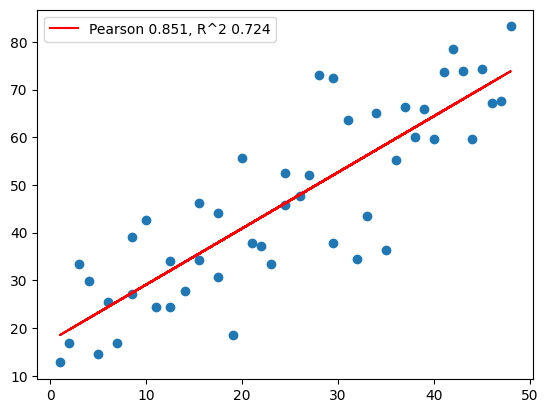

In [157]:
plot_scatter(rank_xform(df["num_seg_5"]), df["complexity_no_outliers"])

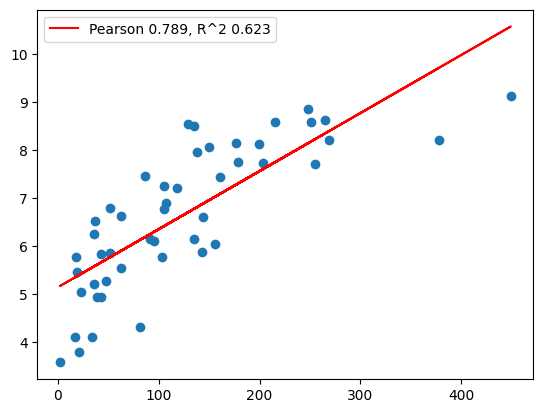

In [158]:
plot_scatter(df["num_seg_5"], sqrt_xform(df["complexity_no_outliers"]))

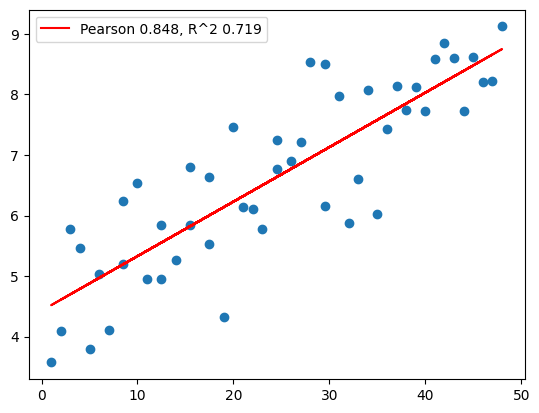

In [159]:
plot_scatter(rank_xform(df["num_seg_5"]), sqrt_xform(df["complexity_no_outliers"]))

# Regression

In [141]:
from sklearn import linear_model

In [188]:
def fit_report_linear(X, y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    print("Pearson: {:.3f} p={}, Spearman: {:.3f} p={}, R^2: {:.3f}".format(
        stats.pearsonr(y, model.predict(X)).statistic, stats.pearsonr(y, model.predict(X)).pvalue, 
        stats.spearmanr(y, model.predict(X)).statistic, stats.spearmanr(y, model.predict(X)).pvalue, 
        r2_score(y, model.predict(X))
    ))

## Try other levels

In [148]:
X, y = df[["num_seg_5"]], df["complexity_no_outliers"]
fit_report_linear(X, y)

PearsonRResult(statistic=0.8136533241719136, pvalue=2.0768286515301878e-12) SignificanceResult(statistic=0.8544013541949153, pvalue=1.1338527673483075e-14) 0.6620317319360052


In [151]:
X, y = df[["num_seg_5", "num_seg_3"]], df["complexity_no_outliers"]
fit_report_linear(X, y)

PearsonRResult(statistic=0.8180730468542932, pvalue=1.2581566368372494e-12) SignificanceResult(statistic=0.8487176010725309, pvalue=2.5653500550835008e-14) 0.6692435099894667


In [178]:
X, y = rank_xform(df[["num_seg_5"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_4"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_3"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_2"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_1"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)

PearsonRResult(statistic=0.8509466161780036, pvalue=1.8699768133554217e-14) SignificanceResult(statistic=0.8544013541949153, pvalue=1.1338527673483075e-14) 0.7241101435847948
PearsonRResult(statistic=0.8516341483623405, pvalue=1.6944671997773976e-14) SignificanceResult(statistic=0.8548321440442845, pvalue=1.064319233929032e-14) 0.7252807226568491
PearsonRResult(statistic=0.8552296080460535, pvalue=1.003771755713466e-14) SignificanceResult(statistic=0.8614194602168483, pvalue=3.939699116447882e-15) 0.7314176824786065
PearsonRResult(statistic=0.8532802104950339, pvalue=1.3355982724668381e-14) SignificanceResult(statistic=0.8548864225473033, pvalue=1.0558510008915021e-14) 0.7280871176224496
PearsonRResult(statistic=0.8520226414494714, pvalue=1.602329725123912e-14) SignificanceResult(statistic=0.8607175812842642, pvalue=4.3902965866684394e-15) 0.7259425815425347


In [167]:
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["num_seg_3"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)

PearsonRResult(statistic=0.8517046252912924, pvalue=1.6773874828049676e-14) SignificanceResult(statistic=0.8582711361554364, pvalue=6.37451322433322e-15) 0.725400768742581


## Try segment labels

In [189]:
X, y = rank_xform(df[["num_seg_5"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["num_unique_seglabels"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_unique_seglabels"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["semsim"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "semsim"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_unique_seglabels", "semsim"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df[["num_seg_5", "num_unique_seglabels"]]), df["semsim"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)

Pearson: 0.851 p=1.8699768133554217e-14, Spearman: 0.854 p=1.1338527673483075e-14, R^2: 0.724
Pearson: 0.870 p=9.375449037731566e-16, Spearman: 0.877 p=3.1798898283443674e-16, R^2: 0.758
Pearson: 0.880 p=1.841495878432384e-16, Spearman: 0.885 p=6.733927408765301e-17, R^2: 0.774
Pearson: 0.859 p=5.776414712679805e-15, Spearman: 0.865 p=2.272258780530967e-15, R^2: 0.738
Pearson: 0.852 p=1.5472358825620202e-14, Spearman: 0.857 p=7.40540839128295e-15, R^2: 0.726
Pearson: 0.880 p=1.788774029841656e-16, Spearman: 0.885 p=7.614596366900416e-17, R^2: 0.774
Pearson: 0.880 p=1.6577958316775402e-16, Spearman: 0.880 p=1.8168335855328125e-16, R^2: 0.775
